# Importer les packages

In [1]:
# prendre en charge les tableaux multidimentionnels
import numpy as np
# visualiser les données
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# analyse de données
import pandas as pd
# rendre les graphiques statistiques matplotlib plus esthetique
import seaborn as sns
# apprentissage automatique
import sklearn
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import scipy.stats as st

# Charger et affichager nos données

In [2]:
# Lecture de la base de données
data = pd.read_csv("products.csv", sep= '\t', low_memory= False)
# imprimer toutes les colonnes
pd.set_option('display.max_columns', None)
# aficher les 5 premiers resultats
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [3]:
df=data.copy()

# Ajout d'un nouveau produit dans la base de données

In [4]:
#Renseigner un nouveau produit
new_product = {
  'code':'barcode',
  'url'  : 'url',
  'creator'  : 'nom du creator',
  'product_name' : 'myProduct',
  'stores'  : 'store',
  'brands': 'brand',
  'packaging': 'packaging'
    }
df_new=pd.DataFrame([new_product])
#Ajoutez un nouveau produit.
df=df.append(df_new,ignore_index=True)

In [5]:
df.tail()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
1708994,999999999,http://world-en.openfoodfacts.org/product/9999...,nutrinet-sante,1.608106e+09,2020-12-16T07:58:23Z,1.608106e+09,2020-12-16T07:58:24Z,Thé noir BIO Darjeeling,NaN,NaN,NaN,NaN,NaN,NaN,Pagès,pages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
#supprimer la ligne ajouté pour nettoyer ma dataset

In [7]:
df=df[:-1]

In [8]:
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1.529059e+09,2018-06-15T10:38:00Z,1.561464e+09,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Comprendre les données:
## 1- Identifier la variable target : Nutri-score=nutriscore_grade

In [9]:
# le nombre de produits par classe (nutriscore_grade) 
score= df["nutriscore_grade"].value_counts().head(10).to_frame()
p = score.style.background_gradient(cmap='coolwarm')
p

,nutriscore_grade
d,200421
c,136039
e,122159
a,104119
b,82021


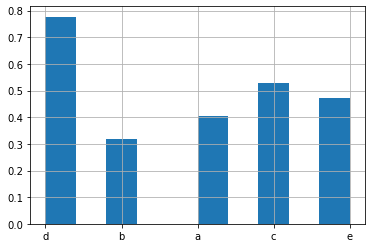

In [10]:
#visualisation en histogramme
df["nutriscore_grade"].hist(density=True)
plt.show()

In [11]:
# la plupart des produits sont du classe d

Text(0.5, 1.0, 'Partition des differentes classes de Nutri-score')

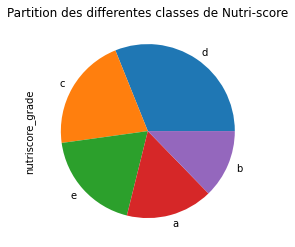

In [12]:
#visualisation en camembert
df["nutriscore_grade"].value_counts().plot.pie()
plt.title('Partition des differentes classes de Nutri-score')

## 2- les lignes et les colonnes 

In [13]:
# Imprime un résumé court d’un DataFrame:Pour obtenir un aperçu rapide de l’ensemble de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708998 entries, 0 to 1708997
Columns: 184 entries, code to carnitine_100g
dtypes: float64(124), object(60)
memory usage: 2.3+ GB


In [14]:
# imprimer un résumé complet : liste de toutes les colonnes avec leurs types de données et le nombre de valeurs non nulles dans chaque colonne. 
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708998 entries, 0 to 1708997
Data columns (total 184 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   code                                        1708998 non-null  object 
 1   url                                         1708998 non-null  object 
 2   creator                                     1708994 non-null  object 
 3   created_t                                   1708998 non-null  float64
 4   created_datetime                            1708998 non-null  object 
 5   last_modified_t                             1708998 non-null  float64
 6   last_modified_datetime                      1708998 non-null  object 
 7   product_name                                1631817 non-null  object 
 8   abbreviated_product_name                    2996 non-null     object 
 9   generic_name                                112649 non-n

In [15]:
# dimension de la base de données
df.shape

(1708998, 184)

In [16]:
# les variables
print(df.columns)

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'abbreviated_product_name', 'generic_name',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=184)


## 3- les types des variables

In [17]:
df.dtypes.value_counts()

float64    124
object      60
dtype: int64

Text(0.5, 1.0, 'partition des differents types de variables')

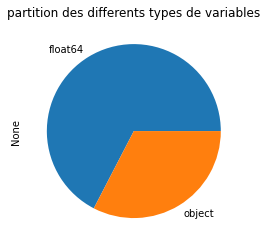

In [18]:
#visualisation en camembet
df.dtypes.value_counts().plot.pie()
plt.title('partition des differents types de variables')

## 4- Pourcentage des valeurs manquantes 

In [19]:
#pourcentaage des valeurs manquantes dans la base de données
percentage = (df.isnull().sum().sum()/(df.shape[0]*df.shape[1])) * 100
print("le pourcentage des valeurs manquantes est: " + str(percentage)+'%')

le pourcentage des valeurs manquantes est: 79.50215374104033%


In [20]:
#pourcentages des valeurs mnquantes sur chaque colonne
(df.isnull().sum()/df.shape[0]).sort_values(ascending=True)

code                         0.0
url                          0.0
created_t                    0.0
created_datetime             0.0
last_modified_t              0.0
                            ... 
ingredients_from_palm_oil    1.0
water-hardness_100g          1.0
no_nutriments                1.0
allergens_en                 1.0
cities                       1.0
Length: 184, dtype: float64

# Regroupement des produits

## 1- par pays

In [21]:
# les provenance des produits de notre dataframe
countries=df['countries_en'].value_counts().to_frame()
countries

,countries_en
France,713551
United States,341459
Spain,194320
Germany,56826
Italy,49120
...,...
"France,Guadeloupe,Morocco",1
"Bolivia,France,Peru,Spain",1
"Czech Republic,Estonia,Latvia,Lithuania,Romania,Russia,Ukraine",1
de:mazedonien,1


In [22]:
# il y'a des lignes de pays separée par des virgule, je choisis de prendre le premier pays de la ligne pour faciliter le traitement
# créer une colonne 'countries_genre' qui stocks ces pays
countries_genre=[]
for i in df['countries_en']:
    if isinstance(i, float) : i=str(i)
    i=i.split(',')
    countries_genre.append(i[0])
countries_genre

['France',
 'France',
 'Spain',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'Spain',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'United States',
 'United States',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'Ireland',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'nan',
 'France',
 'France',
 'France',


In [23]:
#remplacer les valeurs de la colonne 'countries_en' par 'countries _genre' qui contient un seul pays en ligne
df["countries_en"] = countries_genre

In [24]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1.529059e+09,2018-06-15T10:38:00Z,1.561464e+09,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [25]:
# classement de pays par nombre de produit present
df['countries_en'].value_counts().to_frame()

,countries_en
France,767892
United States,341470
Spain,195222
Germany,69024
Belgium,59869
...,...
de:keine-ahnung,1
London,1
fr:3-57,1
Paises-bajos,1


In [26]:
# je crée un dictionnaire pour correspondre les noms des pays mal renseigné ou rensigné ave des langues etrangeres
country_rename = {'Réunion':'France','es:latinoamerica': 'United States', 'Mayotte':'France','Suisse':'Switzerland','Belgien':'Belgium','Belgie':'Belgium','�':'NaN','0':'NaN','pl:nie-podano':'NaN',"e,s,:,NaN":"NaN",
    'ایران':'Iran', 'Papua New Guinea': 'Guinea','Deutschland':'Germany','Francia':'France','Frankreich':'France','All-over-the-world':'NaN','American Samoa':'United States','Greenlan':'NaN', 
    'fr:5-97': 'France',  'Aldi':'France','Republic of the Congo':'Democratic Republic of the Congo','Frence':'France','Grenada':'Spain','Xk':'NaN','Sverige':'Sweden','Kolkata':'India','fr:bordeaux':'France',
   'U-s-minor-outlying-islands':'United States', 'Suiza':'Switzerland', 'Everywhere':'NaN','South Sudan':'Sudan','State of Palestine':'Palestinian territories','Maroc':'Morocco','Australie':'Australia', 
    'Belgique-en-belgium':'Belgium', 'it:london':'United Kingdom','En':'United Kingdom','World':'NaN','fr:dom-tom':'France','Montserrat':'Spain','de:keine-ahnung':'NaN','France-en-australia':'France',
    'da:over-alt-i-verden':'NaN', '9-ft86rbf76f7jtfj5':'NaN', 'Spanien':'Spain','Belgique':'Belgium','East Germany':'Germany','France-en-nl':'France','Suomi':'Finland','Royaume-uni':'United Kingdom',
    'de:refresco-deutschland-gmbh':'Deutschland', 'de:europa':'European Union','Argentina-espanol':'Argentine','fr:الأردن':'Jordan','Franța':'France','Italien':'Italy','fr:cemac':'NaN','pl:polska-poland':'Poland',
    'cs:cesko':'Czech Republic', 'Hahqh':'NaN', 'it:nd':'Netherland', 'روسيا':'Russia','Ελλάδα':'Belgium','England':'United Kingdom','fr:f':'France','Uuiiiu':'NaN','es:coronaponpis':'NaN',"es:408889642364":"NaN",    
    'fr:Spanien':'Spain', 'Pays-bas':'Netherland', 'fr:Saudi-arabien':'Saudi Arabia','Sint Maarten':'France','fr:afrique':'NaN','Swaziland':'Switzerland','Belgio':'Belgium','fr:3-57':'NaN','nan':'NaN',
    'Virgin Islands of the United States':'United States', 'fr:England':'England','Caribbean Netherlands':'Netherlands','Espagne':'Spain','All-overseas':'NaN',"es:0":'NaN','London':'United Kingdom',
    'Allemagne':'Germany', 'fr:Vereinigtes-konigreich':'United Kingdom', 'Belgique':'Belgium','Virgin Islands of the United States':'United States','Frankrijk':'France','Belgique-suisse-en-switzerland-en-france':'Belgium',
    'United-states-of-america':'United States','Guadeloupe':'France','Martinique':'France','Nederland':'Netherland','ro:ue':'NaN','de:mazedonien':'Macedonia','es:espagne':'Spain',
                  'Argentina-y-paraguay':'Argentina', 'Christmas Island':'Australia', 'Paises-bajos':'Netherland','Other-turquie':'Turkey','fr:deutschland':'Germany','Бельгія':'Belgium','es:mundial':'NaN',
    'Guadeloupe':'France','French Guiana':'France', 'Saint Martin':'France','French Polynesia':'France','fr:quebec':'Canada', 'Quebec':'Canada','المانيا':'Germany','fr:internet':'France','Česko':'Czech Republic','Unknown':'NaN',
     'fr:Deutschland':'Germany', 'Saint Pierre and Miquelon':'France'}

In [27]:
# creer une nouvelle liste pour stocker ces pays
country_new = []
for s in df['countries_en']: 
    if s in country_rename.keys():
        country_new.append(country_rename[s])
    else:
        country_new.append(s)
country_new        

['France',
 'France',
 'Spain',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'Spain',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'United States',
 'United States',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'Ireland',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'France',
 'NaN',
 'France',
 'France',
 'France',


In [28]:
# les remplacer  la colonne 'countries_en'
df['countries_en']=country_new

In [29]:
#nombre de produits par pays
countries=df['countries_en'].value_counts().to_frame()
countries

,countries_en
France,772147
United States,341479
Spain,195230
Germany,69082
Belgium,59898
...,...
Saint Vincent and the Grenadines,1
British Indian Ocean Territory,1
North Korea,1
South-asia,1


<AxesSubplot:ylabel='countries_en'>

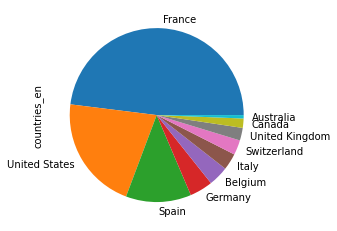

In [30]:
#Les produits par pays (les 10 premiers)
df["countries_en"].value_counts().head(10).plot(kind='pie')

In [31]:
#les produits sont majoritairement de France et USA

In [32]:
# une idée de representer les pays sur une carte du monde :source internet

In [33]:
# converting to df and assigning new names to the columns
df_countries = pd.DataFrame(countries)
df_countries = df_countries.reset_index()
df_countries.columns = ['country_name', 'Nbr_produit'] # change column names
df_countries

,country_name,Nbr_produit
0,France,772147
1,United States,341479
2,Spain,195230
3,Germany,69082
4,Belgium,59898
...,...,...
211,Saint Vincent and the Grenadines,1
212,British Indian Ocean Territory,1
213,North Korea,1
214,South-asia,1


In [34]:
df_countries.shape

(216, 2)

In [35]:
# We need to create data and layout variable which contains a dict
data = dict(type='choropleth',
                locations = df_countries['country_name'],
                locationmode = 'country names',
                z = df_countries['Nbr_produit'],
                text = df_countries['country_name'],
                colorbar = {'title':'Nbr produit'},
                colorscale = 'Viridis',
                reversescale = True
                )

# Lets make a layout
layout = dict(title='Disponibilité de produits par pays',
geo = dict(showframe=False,projection={'type':'mercator'}))

# Pass the data and layout and plot using iplot
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [36]:
#le nutriscore moyen par pays

In [37]:
country_nutriscore=df.groupby(["countries_en"])["nutriscore_score"].mean()
country_nutriscore 

countries_en
Afghanistan       9.821429
Albania           9.333333
Algeria          10.623955
Andorra           8.262295
Angola            8.857143
                   ...    
Yemen            11.666667
Yugoslavia        2.000000
Zambia           17.500000
Zimbabwe         -5.000000
Åland Islands    11.750000
Name: nutriscore_score, Length: 216, dtype: float64

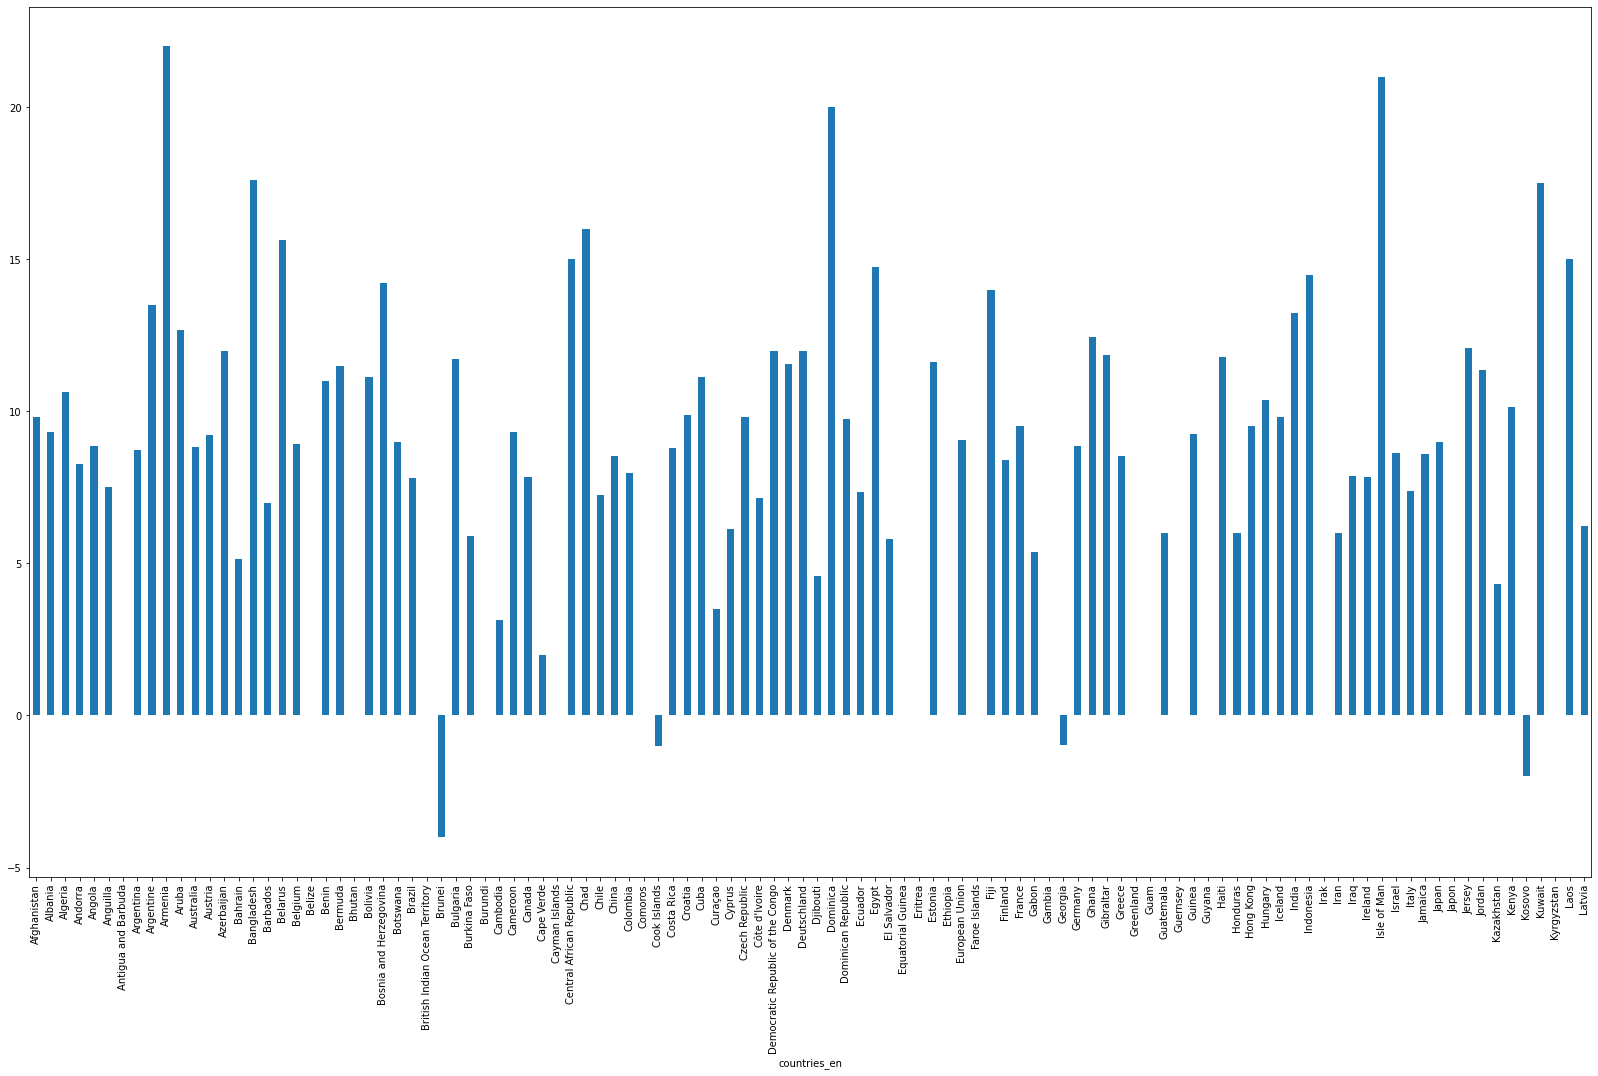

In [40]:
country_nutriscore.head(108).plot(kind='bar')
plt.rcParams["figure.figsize"] = (28, 16)

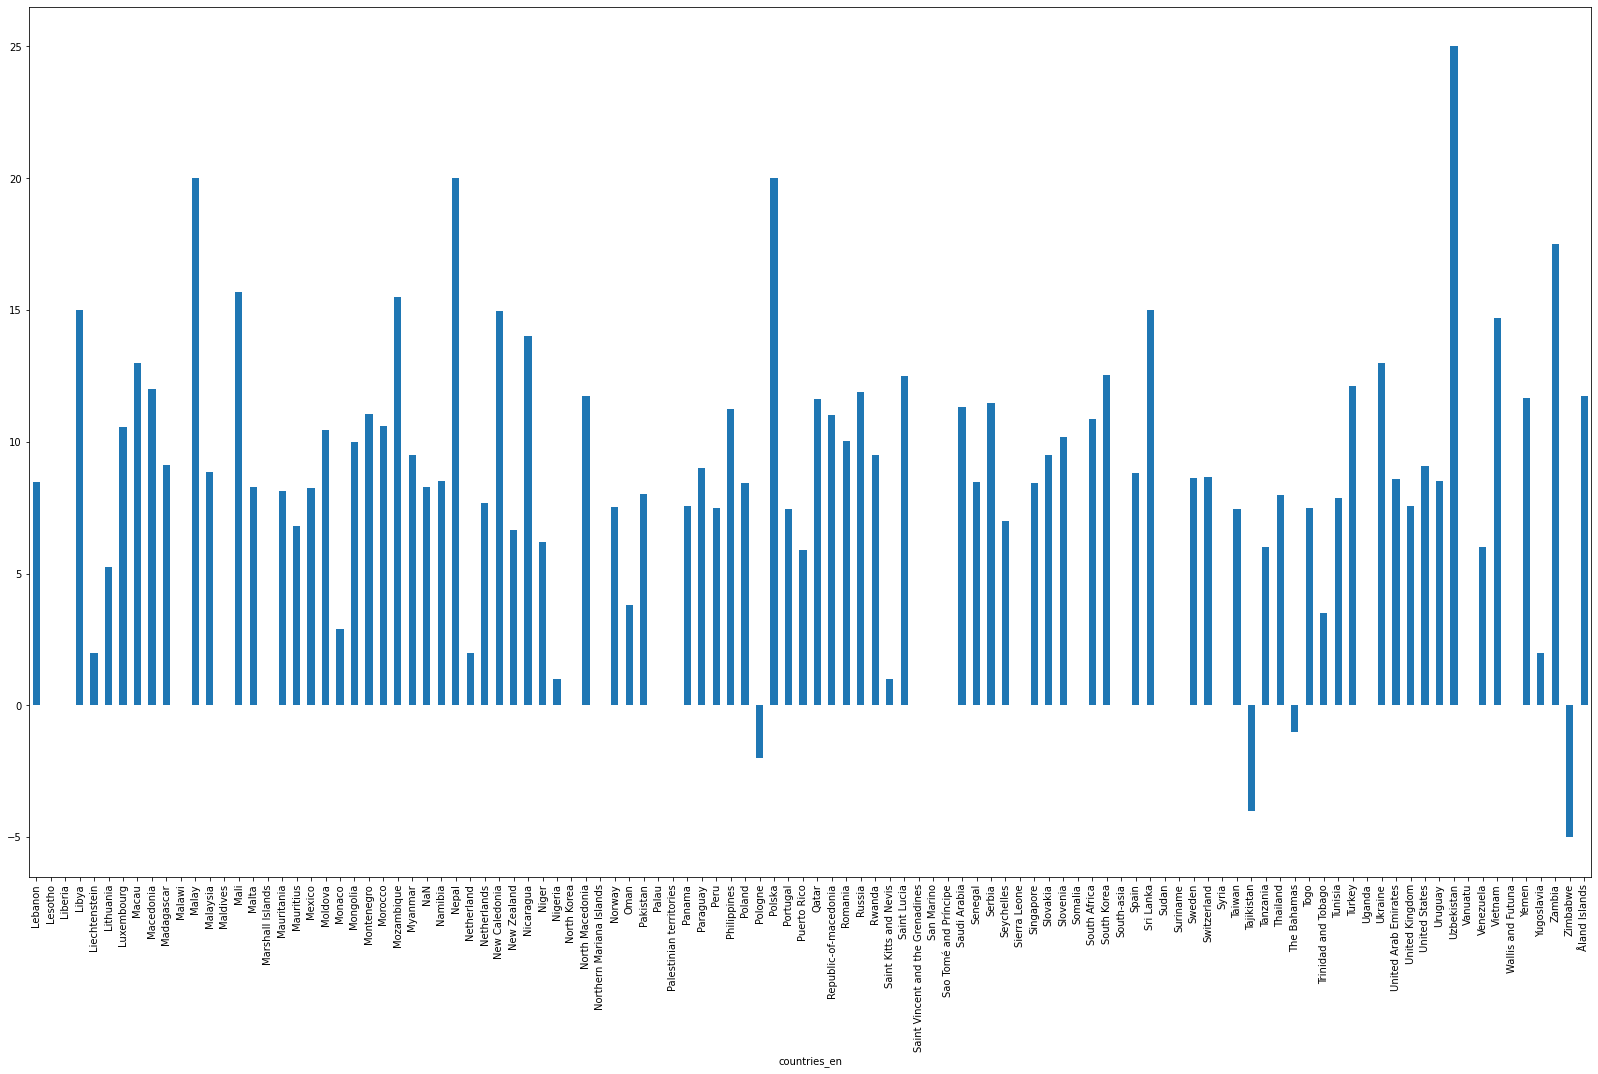

In [39]:
country_nutriscore.tail(108).plot(kind='bar')
plt.rcParams["figure.figsize"] = (28, 16)

## 2- par catégorie

In [41]:
categories=df['categories_en'].value_counts().to_frame()
categories

,categories_en
Snacks,32876
"Groceries,Sauces",15746
"Snacks,Sweet snacks,Confectioneries",15220
"Dairies,Fermented foods,Fermented milk products,Cheeses",14575
"Snacks,Sweet snacks,Biscuits and cakes,Biscuits",14335
...,...
"Dairies,Fermented foods,Fermented milk products,Yogurts,Plain yogurts,Cow-milk-yogurt,Lactose-free yogurts,Sweetened yogurts",1
"Seafood,Fishes,Frozen foods,Fish preparations,Breaded products,Breaded fish,Breaded Hake fish",1
"Plant-based foods and beverages,Plant-based foods,Cereals and potatoes,Cereals and their products,Rice-tortillas,Tortillas",1
"Plant-based foods and beverages,Plant-based foods,Groceries,Condiments,Culinary plants,fr:sauce-condimentaire-a-base-de-raiford",1


In [42]:
# meme demarche que les pays
categories_genre=[]
for i in df['categories_en']:
    if isinstance(i, float) : i=str(i)
    i=i.split(',')
    categories_genre.append(i[0])
categories_genre

['nan',
 'nan',
 'nan',
 'Groceries',
 'fr:xsf',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'fr:pate-d-amende',
 'Meals',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'Pies',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'Plant-based foods and beverages',
 'nan',
 'Meats',
 'nan',
 'Meals',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'Plant-based foods and beverages',
 'Dairies',
 'nan',
 'Meats',
 'Plant-based foods and beverages',
 'nan',
 'nan',
 'Plant-based foods and beverages',
 'nan',
 'Seafood',
 'nan',
 'Canned foods',
 'nan',
 'Dairies',
 'Spreads',
 'nan',
 'nan',
 'nan',
 'Seafood',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'Spreads',
 'nan',
 'nan',
 'nan',
 'Meals',
 'nan',
 'nan',
 'Meats',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'na

In [43]:
df["categories_en"] =categories_genre

In [44]:
categories=df['categories_en'].value_counts().head(10).to_frame()
categories

,categories_en
nan,880538
Plant-based foods and beverages,233610
Snacks,139450
Dairies,78323
Meats,62880
Beverages,59217
Groceries,51983
Meals,34671
Desserts,20865
Biscuits and cakes,19886


<AxesSubplot:>

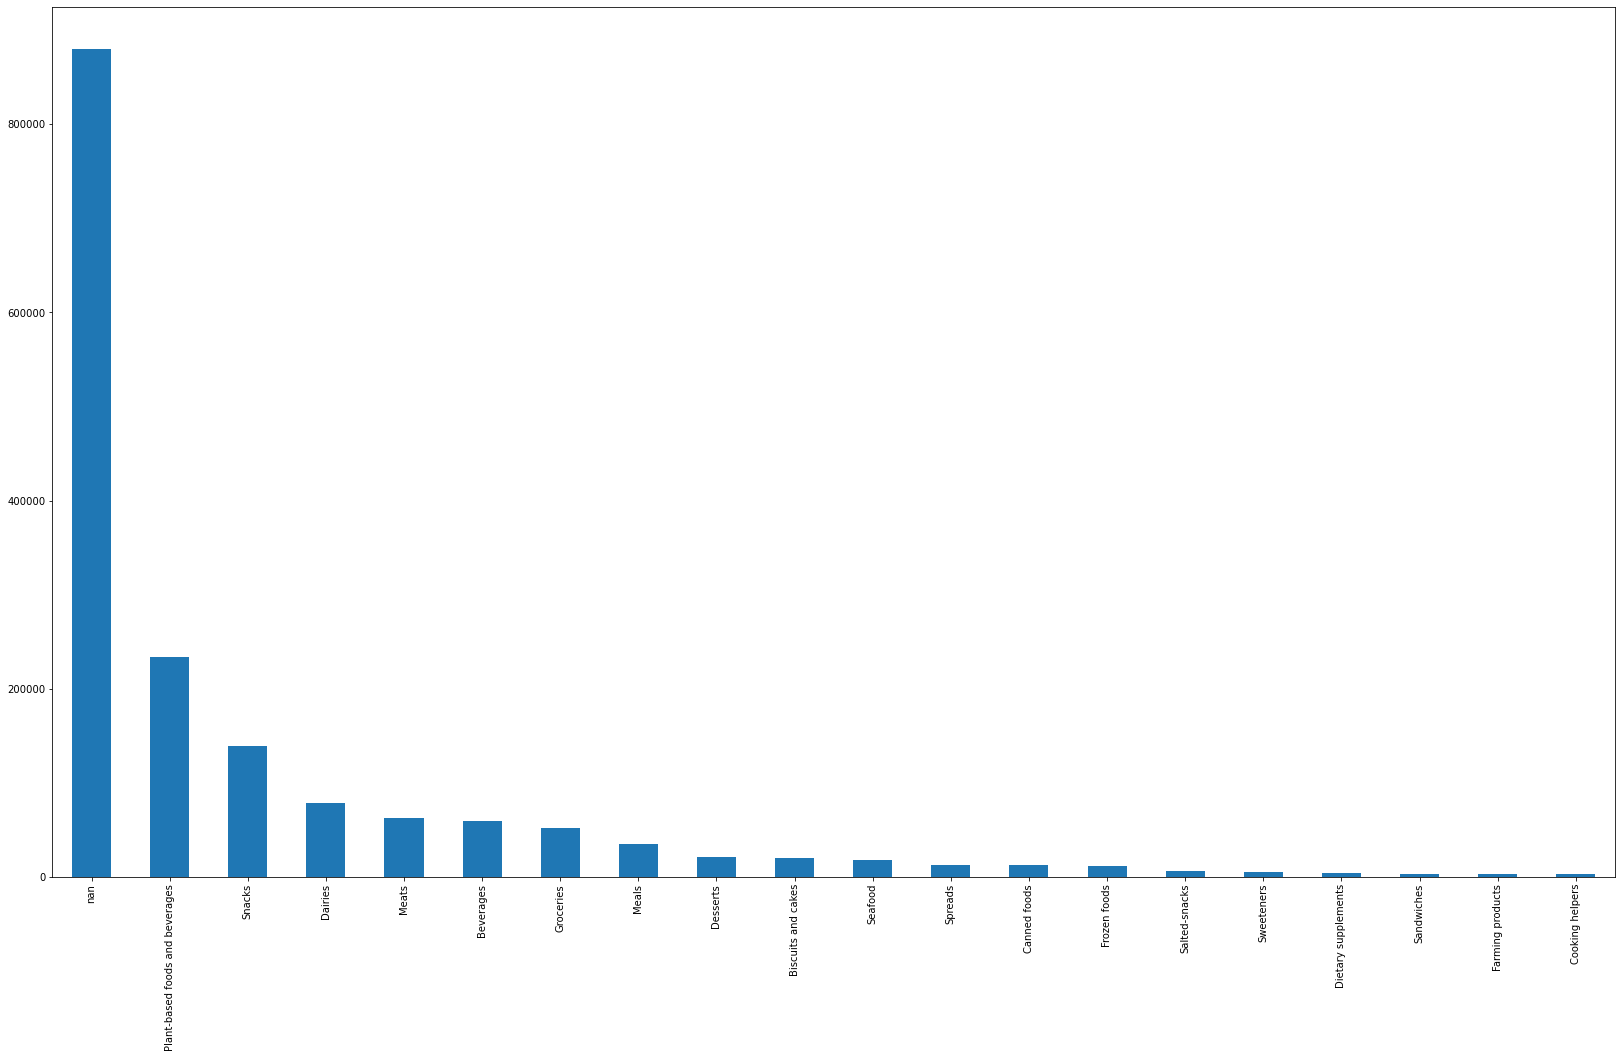

In [45]:
df["categories_en"].value_counts().head(20).plot(kind='bar')

In [46]:
# compter le nobre de produits pour chaque categorie
count_keyword = dict()
for index, col in df['categories_en'].iteritems():
    if isinstance(col, float): continue
    for s in col.split(','):
        if s in count_keyword.keys():
            count_keyword[s] += 1
        else:
            count_keyword[s] = 1

keyword_census = []
for k,v in count_keyword.items():
    keyword_census.append([k,v])
keyword_census.sort(key = lambda x:x[1], reverse = True)
    

In [47]:
# Afficher le nombre de produits par categories
keyword_census[:20]

[['nan', 880538],
 ['Plant-based foods and beverages', 233610],
 ['Snacks', 139450],
 ['Dairies', 78323],
 ['Meats', 62880],
 ['Beverages', 59217],
 ['Groceries', 51983],
 ['Meals', 34671],
 ['Desserts', 20865],
 ['Biscuits and cakes', 19886],
 ['Seafood', 18247],
 ['Spreads', 12604],
 ['Canned foods', 12379],
 ['Frozen foods', 11391],
 ['Salted-snacks', 6772],
 ['Sweeteners', 5546],
 ['Dietary supplements', 3774],
 ['Sandwiches', 3366],
 ['Farming products', 3218],
 ['Cooking helpers', 2846]]

In [48]:
# Generer un nuage de mots : les catégories présentest dans notre base de données: source internet

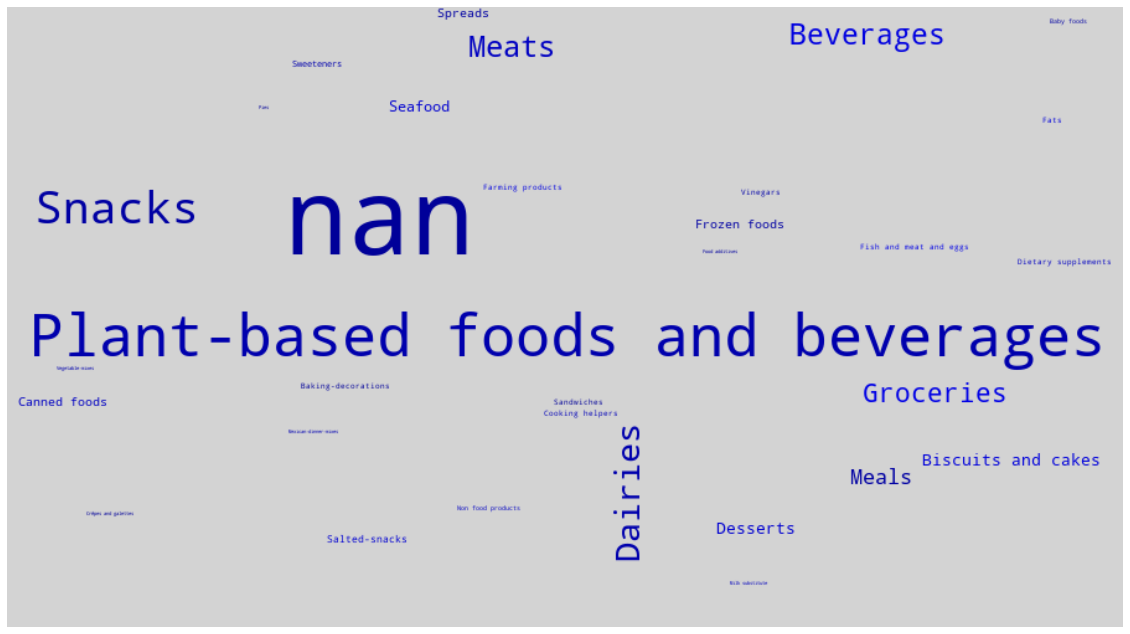

In [49]:
#_____________________________________________
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#_____________________________________________
# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(20,20))
ax1 = fig.add_subplot(1,1,1)
#_______________________________________________________
# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_census[0:1500]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 170.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=900,height=500, background_color='lightgray', 
                      max_words=1628,relative_scaling=0.6,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')
plt.show()


In [50]:
#les categories sont peu renseignés dans ce dataset

## 3- par mots clés : pnns_groups_1 et pnns_groups_2

In [51]:
df["pnns_groups_1"].value_counts()

unknown                    1038474
Sugary snacks               138220
Fish Meat Eggs               87357
Milk and dairy products      83904
Cereals and potatoes         76722
Fat and sauces               64804
Beverages                    63735
Composite foods              51223
Fruits and vegetables        44995
Salty snacks                 30929
fruits-and-vegetables         7224
sugary-snacks                 5183
cereals-and-potatoes            54
salty-snacks                     6
Name: pnns_groups_1, dtype: int64

In [52]:
#définir une fonction qui calcule le nombre de categories
def count_words(df, colonne = 'pnns_groups_1'):
    list_words = set()
    for word in df[colonne].str.split(','):
        if isinstance(word, float) : continue
        list_words = set().union(word, list_words)       
    return list(list_words)

In [53]:
#Ces colonnes donnent des classifications qui sont plus générales que celles de la variable categories_en :
pnns_group1_list = count_words(df, 'pnns_groups_1')  
pnns_group2_list = count_words(df, 'pnns_groups_2')  

In [54]:
pnns_group1_list

['salty-snacks',
 'Composite foods',
 'cereals-and-potatoes',
 'Fat and sauces',
 'Milk and dairy products',
 'Fruits and vegetables',
 'Beverages',
 'fruits-and-vegetables',
 'Cereals and potatoes',
 'Salty snacks',
 'sugary-snacks',
 'Fish Meat Eggs',
 'Sugary snacks',
 'unknown']

In [55]:
# il y a certaines categories qui se repetent , on corrige cela
correct = dict()
correct['cereals-and-potatoes']  = 'Cereals and potatoes'
correct['fruits-and-vegetables'] = 'Fruits and vegetables'
correct['sugary-snacks'] = 'Sugary snacks'
correct['salty-snacks'] = 'Salty snacks'

In [56]:
df['pnns_groups_1'] = df['pnns_groups_1'].replace(correct)

<AxesSubplot:>

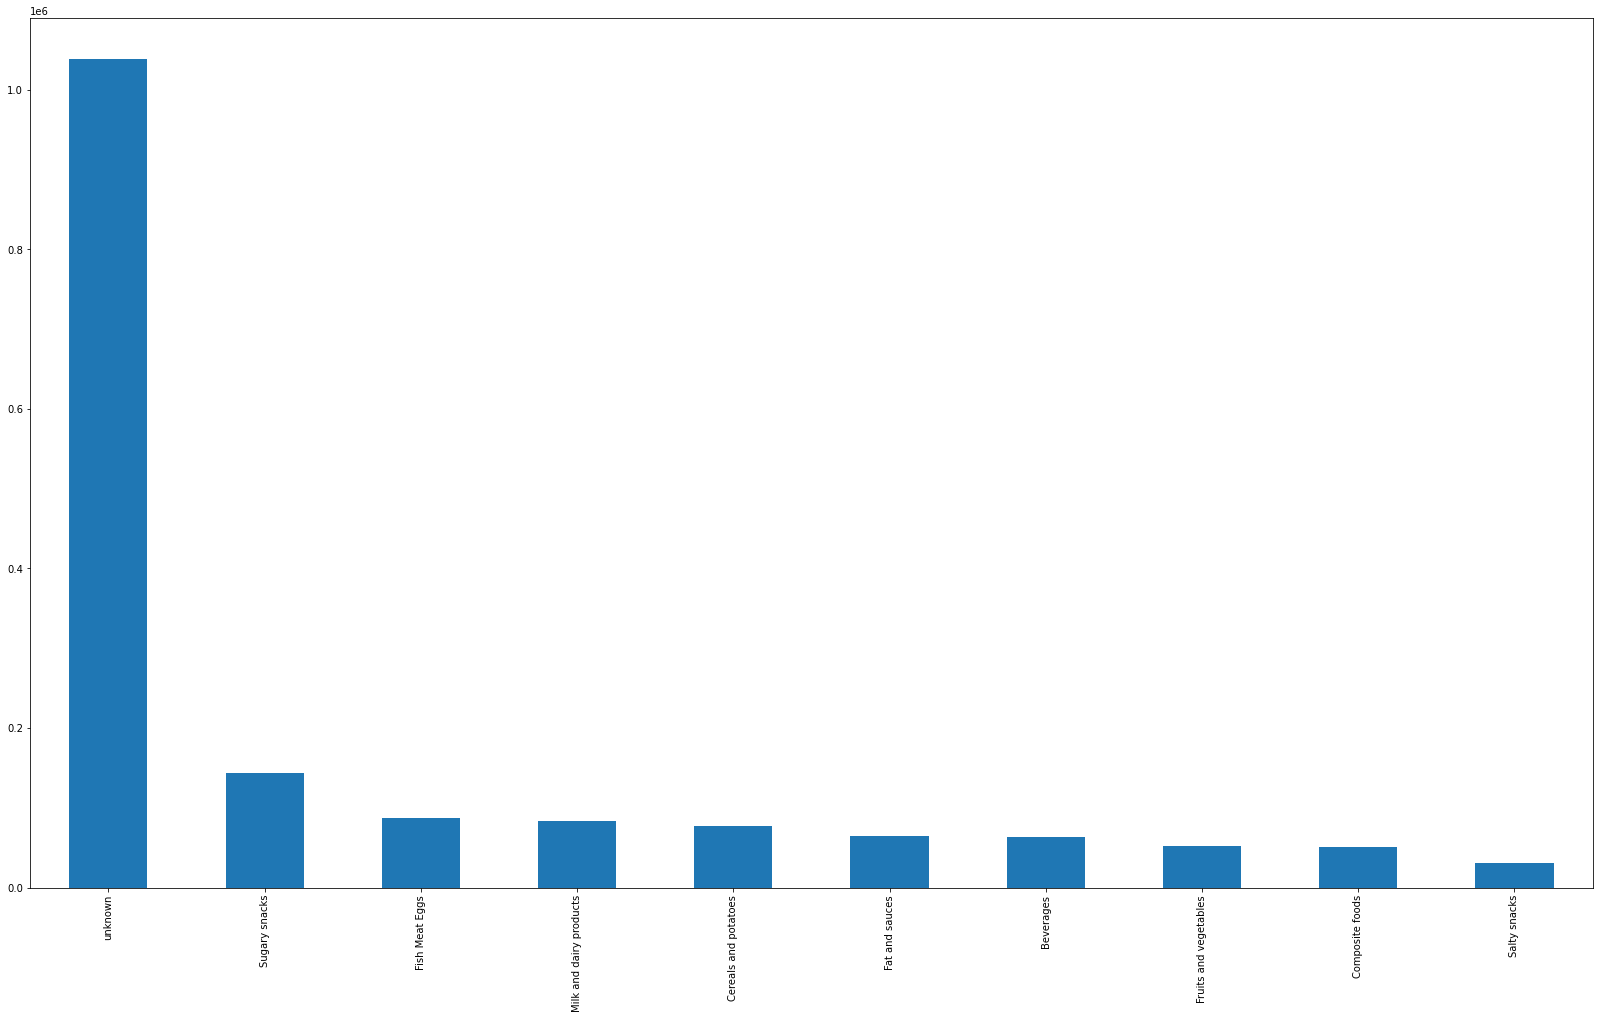

In [57]:
df["pnns_groups_1"].value_counts().plot(kind='bar')

In [58]:
pnns_group2_list

['Alcoholic beverages',
 'Sandwiches',
 'Fish and seafood',
 'Potatoes',
 'Nuts',
 'Dairy desserts',
 'Sweets',
 'Vegetables',
 'One-dish meals',
 'Eggs',
 'nuts',
 'Cereals',
 'Fruits',
 'Processed meat',
 'pastries',
 'legumes',
 'vegetables',
 'Artificially sweetened beverages',
 'Appetizers',
 'cereals',
 'Soups',
 'Unsweetened beverages',
 'Cheese',
 'Meat',
 'Chocolate products',
 'Pizza pies and quiche',
 'Ice cream',
 'Salty and fatty products',
 'Teas and herbal teas and coffees',
 'Offals',
 'Plant-based milk substitutes',
 'Fruit juices',
 'Bread',
 'Legumes',
 'Sweetened beverages',
 'Dried fruits',
 'Pizza pies and quiches',
 'unknown',
 'Breakfast cereals',
 'Waters and flavored waters',
 'Milk and yogurt',
 'Dressings and sauces',
 'Fruit nectars',
 'Fats',
 'fruits',
 'Biscuits and cakes']

<AxesSubplot:>

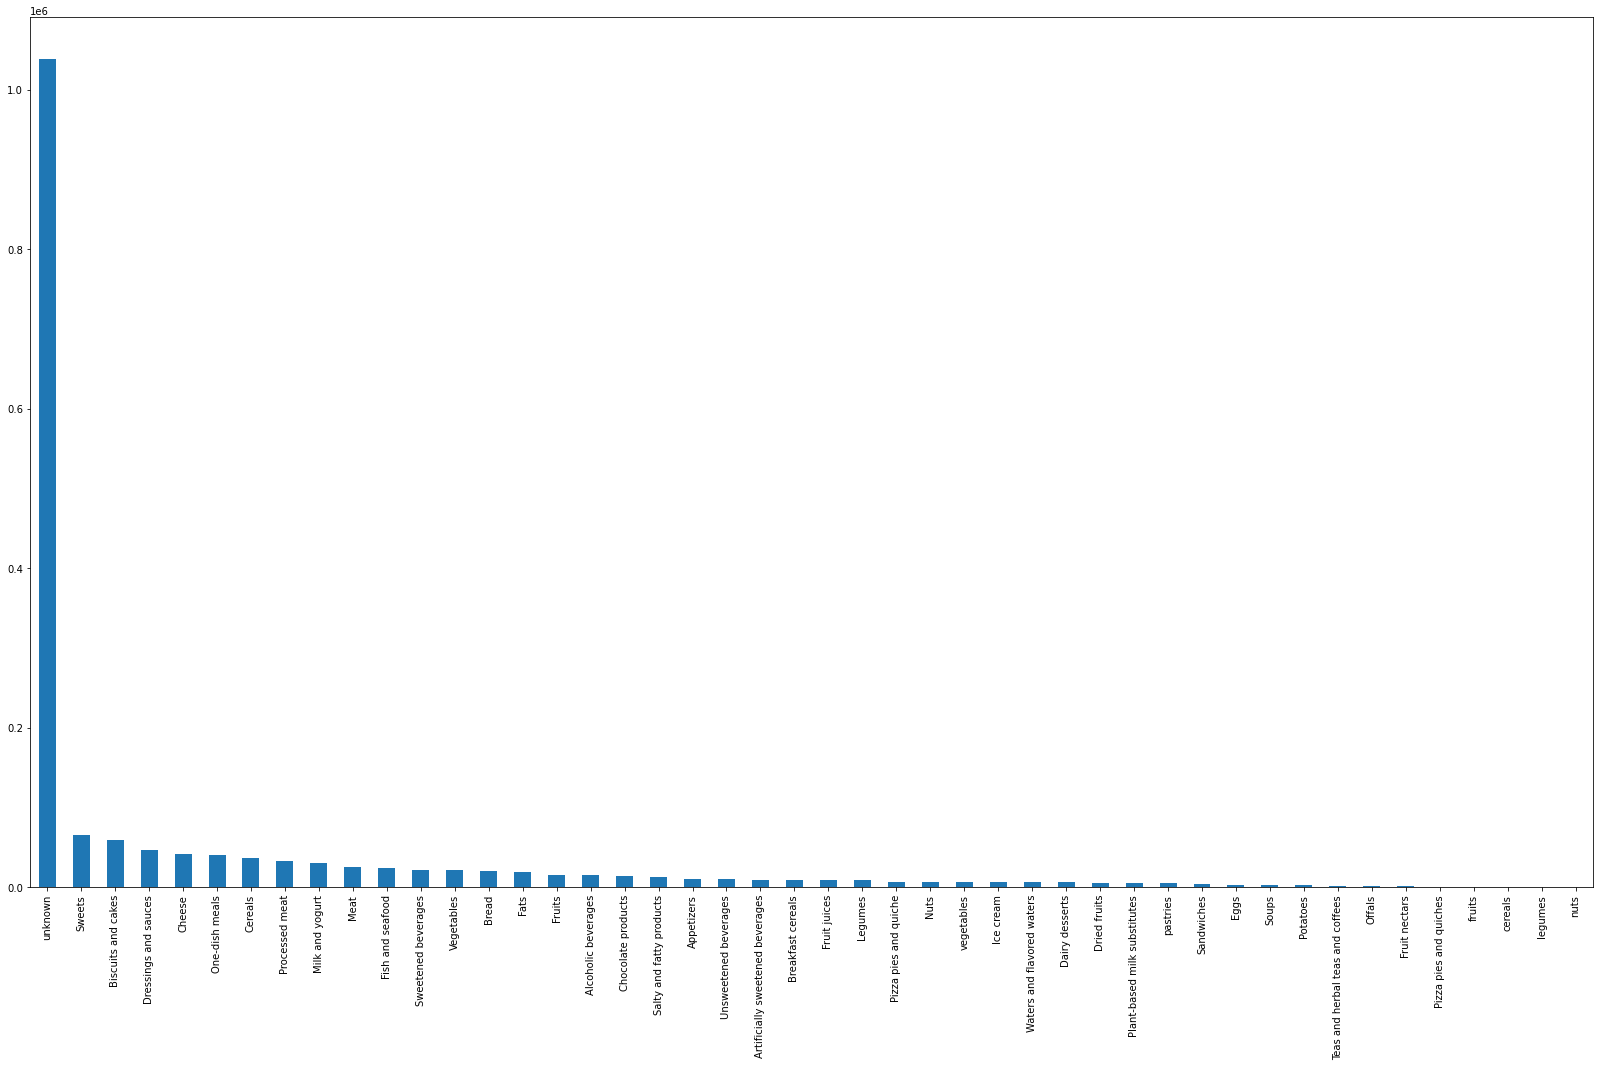

In [59]:
df["pnns_groups_2"].value_counts().plot(kind='bar')

# valeurs manquantes : nutriscore_grade

In [60]:
# valeur manquante sur la colonne de nutrisore
df["nutriscore_grade"].isnull().value_counts()

True     1064239
False     644759
Name: nutriscore_grade, dtype: int64

Text(0.5, 1.0, 'proportion des valeurs manquantes pour la variable nutriscore_grade')

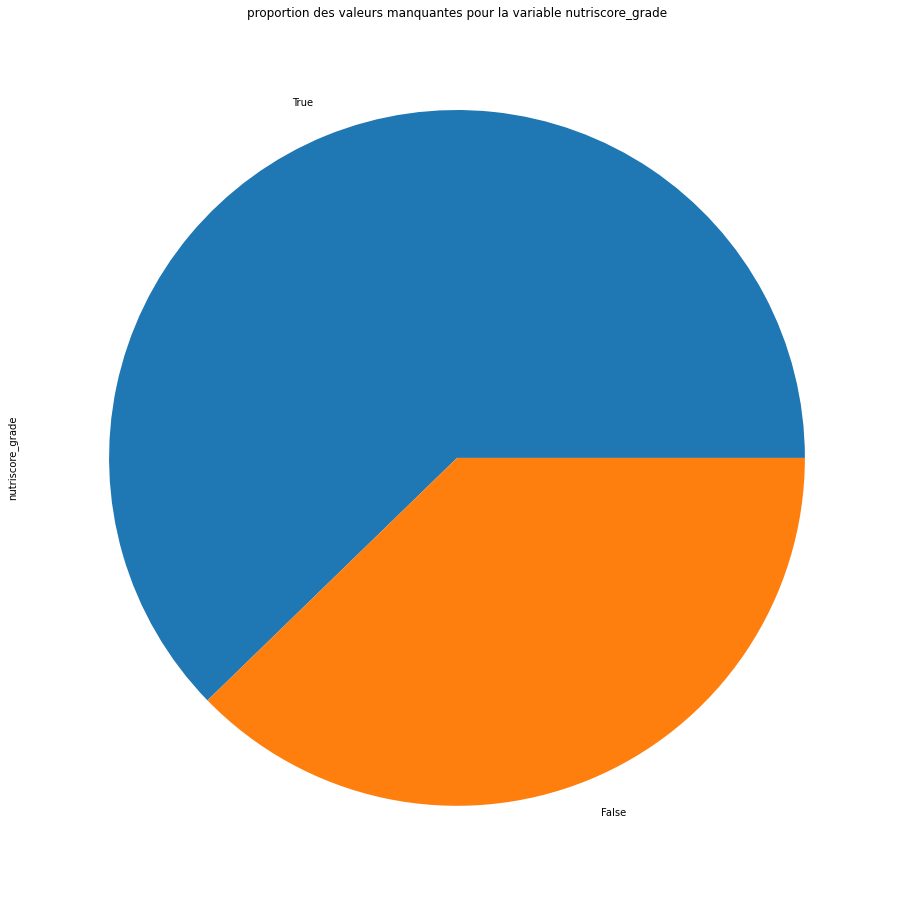

In [61]:
df["nutriscore_grade"].isnull().value_counts().plot.pie()
plt.title('proportion des valeurs manquantes pour la variable nutriscore_grade')

# Idee de l'application:Possibilité d’estimer le nutriscore avec les seules valeurs nutritionnelles présent sur les produits .

In [162]:
#choix des variables pertinentes qui permettent le calcul du nutriscore: basé sur la documentation d'open food facts
data_cols= ["energy_100g",
            "sugars_100g",
            "carbohydrates_100g",
            "fat_100g",
            "saturated-fat_100g", 
            "fiber_100g", 
            "proteins_100g",
            "fruits-vegetables-nuts_100g", 
            "salt_100g",
            "pnns_groups_1",
            "nutriscore_score",
            "nutriscore_grade",
                 ]

data = df[data_cols].copy()

In [163]:
data.head()

,energy_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,salt_100g,pnns_groups_1,nutriscore_score,nutriscore_grade
0,1569.0,15.0,70.1,7.0,3.08,NaN,7.8,NaN,1.4,unknown,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN
3,936.0,22.0,29.0,8.2,2.20,0.0,5.1,NaN,4.6,Fat and sauces,18.0,d
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN


In [164]:
#dimension de la dataset
data.shape

(1708998, 12)

In [165]:
#chaneger les produits renseigner en 'unknown' en Valeurs manquantes
data.loc[data["pnns_groups_1"] == 'unknown', 'pnns_groups_1'] = np.nan

In [166]:
data.head()

,energy_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,salt_100g,pnns_groups_1,nutriscore_score,nutriscore_grade
0,1569.0,15.0,70.1,7.0,3.08,NaN,7.8,NaN,1.4,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,936.0,22.0,29.0,8.2,2.20,0.0,5.1,NaN,4.6,Fat and sauces,18.0,d
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# pourcentage des valeurs manquantes dans la base de données

In [167]:
percentage = (data.isnull().sum().sum()/(data.shape[0]*data.shape[1])) * 100
print("le pourcentage des valeurs manquantes est: " + str(percentage)+'%')

le pourcentage des valeurs manquantes est: 42.61989579078891%


# Nettoyage

## 1-Les lignes repetées 

In [168]:
# reperer les lignes repetées

In [169]:
data.duplicated().sum()

671861

In [170]:
# les supprimer
data.drop_duplicates(inplace=True)

In [171]:
data.duplicated().sum()

0

## 2- les lignes vides

In [172]:
# on repere les lignes vides
cols_100g = [s for s in data.columns if '_100g' in s]
data_cols_100g = data[cols_100g]
print('nombre de lignes dont les colonnes _100g sont vides: {}'.format(data_cols_100g.isnull().all(axis=1).sum()))
# et on les supprime
data = data[data_cols_100g.notnull().any(axis=1)]

nombre de lignes dont les colonnes _100g sont vides: 69


In [173]:
data.shape

(1037068, 12)

In [174]:
#Analyses descriptives

In [175]:
#variables numériques
data.describe()

,energy_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,salt_100g,nutriscore_score
count,1.032578e+06,1.019231e+06,1.029888e+06,1.029949e+06,1.004618e+06,360103.000000,1.031261e+06,7565.000000,983155.000000,490168.000000
mean,6.455259e+36,1.382653e+01,3.033634e+01,1.453507e+01,1.501016e+01,3.129735,8.644196e+00,35.969522,2.285323,9.380808
std,6.559566e+39,2.048414e+01,7.610749e+02,9.944742e+02,9.977011e+03,6.698265,1.706909e+02,36.140912,157.733713,8.841591
min,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-20.000000,-5.000000e+02,0.000000,0.000000,-15.000000
25%,4.600000e+02,1.000000e+00,5.000000e+00,1.000000e+00,2.000000e-01,0.000000,1.800000e+00,0.000000,0.100000,2.000000
50%,1.100000e+03,4.300000e+00,1.880000e+01,7.500000e+00,2.000000e+00,1.700000,6.000000e+00,25.000000,0.600000,10.000000
75%,1.686000e+03,2.000000e+01,5.380000e+01,2.100000e+01,7.000000e+00,3.700000,1.176000e+01,60.000000,1.375000,16.000000
max,6.665559e+42,6.880000e+03,7.629390e+05,9.999990e+05,9.999999e+06,2020.000000,1.730000e+05,100.000000,92500.000000,40.000000


## 3- les valeurs aberrantes, atypiques et erronnées

In [176]:
# ily'a beaucoup de valeurs abberantes dans notre dataset

In [177]:
# supprimer les valeurs nutritionnelles supérieure à 100g
# supprimer les valeurs négatives
cols = [col for col in data.columns if '_100g' in col]
data_cols = data[cols]
for col in cols:
    if col!=data.columns[0]:
        data.drop(data.loc[data[col]>100].index, inplace=True)
        data.drop(data.loc[data[col]<0].index, inplace=True)


In [178]:
data.describe()

,energy_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,salt_100g,nutriscore_score
count,1.031646e+06,1.018404e+06,1.028982e+06,1.029025e+06,1.003777e+06,359411.000000,1.030343e+06,7564.000000,982255.000000,489875.000000
mean,6.461091e+36,1.380855e+01,2.944055e+01,1.335239e+01,5.022458e+00,3.103240,8.455552e+00,35.974277,1.336872,9.376706
std,6.562529e+39,1.912432e+01,2.725316e+01,1.612398e+01,7.566226e+00,5.025455,9.614249e+00,36.140934,4.285518,8.839932
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-15.000000
25%,4.600000e+02,1.000000e+00,5.000000e+00,1.000000e+00,2.000000e-01,0.000000,1.800000e+00,0.000000,0.100000,2.000000
50%,1.100000e+03,4.300000e+00,1.878000e+01,7.500000e+00,2.000000e+00,1.700000,6.000000e+00,25.000000,0.600000,10.000000
75%,1.686000e+03,2.000000e+01,5.380000e+01,2.100000e+01,7.000000e+00,3.700000,1.176000e+01,60.000000,1.370000,16.000000
max,6.665559e+42,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,1.000000e+02,100.000000,100.000000,40.000000


In [179]:
#supprimer les quantités d'énergie supérieure à 3700kJ qui correspnd a 100% de graisses(le max dans 100g)
data.drop(data.loc[data['energy_100g']>3700].index, inplace=True)

In [180]:
# on introduit une nouvelle variable("energis_cal") qui calcule l'energie en fonction des valeurs nutrituves connues . 
#l'energie est en Kj alors la formule EKJ=lipides*39 + sucre*17 + proteine*17
# on verifie les calories (l'energie) pour 100g avec la formule connue
data["energy_cal"] = data["fat_100g"] * 39 + data["carbohydrates_100g"] * 17 + data["proteins_100g"] * 17
data.head()

,energy_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,salt_100g,pnns_groups_1,nutriscore_score,nutriscore_grade,energy_cal
0,1569.0,15.0,70.1,7.0,3.08,NaN,7.8,NaN,1.40,NaN,NaN,NaN,1597.3
3,936.0,22.0,29.0,8.2,2.20,0.0,5.1,NaN,4.60,Fat and sauces,18.0,d,899.5
5,88.0,0.4,4.8,0.0,0.00,NaN,0.2,NaN,2.04,NaN,NaN,NaN,85.0
6,251.0,3.0,10.0,3.0,1.00,NaN,2.0,NaN,1.15,NaN,NaN,NaN,321.0
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN


In [181]:
# on introduit une nouvelle variable("nutri_sum") qui calcule la somme  des valeurs nutritives sur la base de 100g. 
#  assurrons nous que la somme lipides, glucides et protéines ne dépasse pas la base de 100g.
data["nutri_sum"] = data.fat_100g + data.carbohydrates_100g + data.proteins_100g
data

,energy_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,salt_100g,pnns_groups_1,nutriscore_score,nutriscore_grade,energy_cal,nutri_sum
0,1569.0,15.0,70.1,7.0,3.08,NaN,7.8,NaN,1.40,NaN,NaN,NaN,1597.3,84.9
3,936.0,22.0,29.0,8.2,2.20,0.0,5.1,NaN,4.60,Fat and sauces,18.0,d,899.5,42.3
5,88.0,0.4,4.8,0.0,0.00,NaN,0.2,NaN,2.04,NaN,NaN,NaN,85.0,5.0
6,251.0,3.0,10.0,3.0,1.00,NaN,2.0,NaN,1.15,NaN,NaN,NaN,321.0,15.0
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708987,1393.0,10.4,30.9,20.2,6.00,NaN,7.4,NaN,1.10,NaN,15.0,d,1438.9,58.5
1708989,925.0,24.0,35.0,7.6,4.80,NaN,2.6,NaN,0.28,Sugary snacks,12.0,d,935.6,45.2
1708992,418.0,1.0,2.0,12.0,1.00,NaN,1.0,NaN,1.00,NaN,NaN,NaN,519.0,15.0
1708995,100.0,0.6,2.4,0.3,0.00,NaN,1.6,NaN,0.64,NaN,NaN,NaN,79.7,4.3


In [182]:
#on ne garde que les valeurs <3700 et les quantités moins 100g
data = data.loc[data.energy_cal <= 3700]
data = data.loc[data.nutri_sum <= 100]

In [183]:
# supprimer les produits qui ont plus de sucre que du glucides
data = data.loc[data.carbohydrates_100g >= data.sugars_100g]

In [184]:
data.shape

(999011, 14)

In [185]:
data.describe()

,energy_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,salt_100g,nutriscore_score,energy_cal,nutri_sum
count,996830.000000,999011.000000,999011.000000,999011.000000,980069.000000,348320.000000,999011.000000,7419.000000,955008.000000,484822.000000,999011.000000,999011.000000
mean,1136.081808,13.757959,29.519433,12.979651,4.890220,3.074696,8.440494,35.705980,1.281842,9.335758,1151.525152,50.939578
std,746.012654,19.003217,27.127215,15.208740,7.116488,4.896120,9.514656,36.136368,3.920348,8.833639,753.755156,31.185525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000
25%,460.000000,1.000000,5.000000,1.000000,0.200000,0.000000,1.900000,0.000000,0.100000,2.000000,470.600000,22.400000
50%,1092.000000,4.300000,19.000000,7.300000,1.900000,1.700000,6.000000,25.000000,0.600000,10.000000,1106.000000,47.500000
75%,1674.000000,20.000000,53.700000,21.000000,6.900000,3.700000,11.700000,60.000000,1.345000,16.000000,1695.000000,83.600000
max,3700.000000,100.000000,100.000000,94.722600,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000,3699.900000,100.000000


## Créer des boxplot pour identifier les outliers

 Dans le boxplot, la boîte s’étend de Q1 à Q3 ; et la ligne horizontale à l’intérieur de la boîte représente la médiane des données. Les moustaches dans le boxplot s’étendent de Q3 à la valeur maximale des données et de la valeur minimale des données à Q1 des données.

La valeur minimale des données est déterminée par la valeur de Q1-1.5(Q3-Q1) tandis que la valeur maximale des données est déterminée par la formule Q3+1.5(Q3-Q1).

Un point de données est tracé comme une valeur aberrante si sa valeur est inférieure à Q1-1,5(Q3-Q1) ou supérieure à Q3+ 1,5(Q3-Q1).


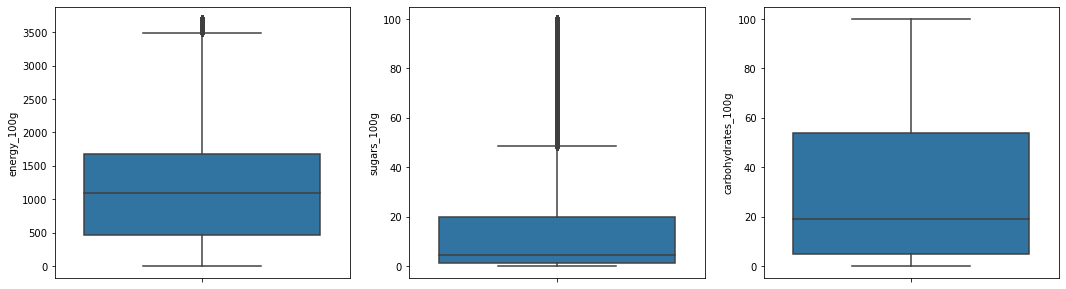

In [186]:
#Creating Box-plots for numeric columns to visually identify outliers
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(y=data["energy_100g"]);
plt.subplot(1,3,2)
sns.boxplot(y=data["sugars_100g"] );
plt.subplot(1,3,3)
sns.boxplot(y=data["carbohydrates_100g"]);

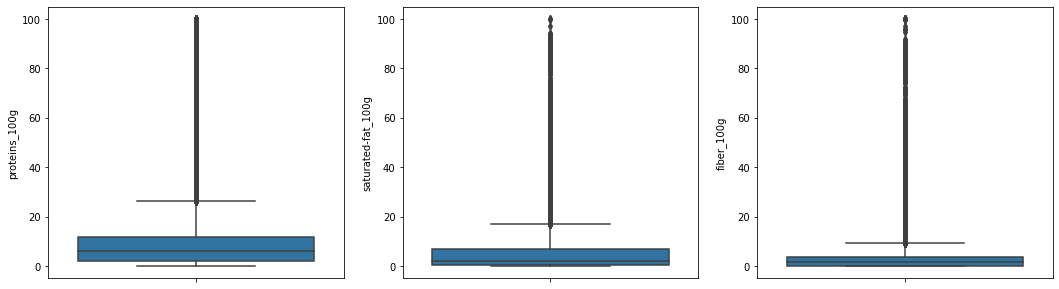

In [187]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(y=data["proteins_100g"]);
plt.subplot(1,3,2)
sns.boxplot(y=data["saturated-fat_100g"]);
plt.subplot(1,3,3)
sns.boxplot(y=data["fiber_100g"]);

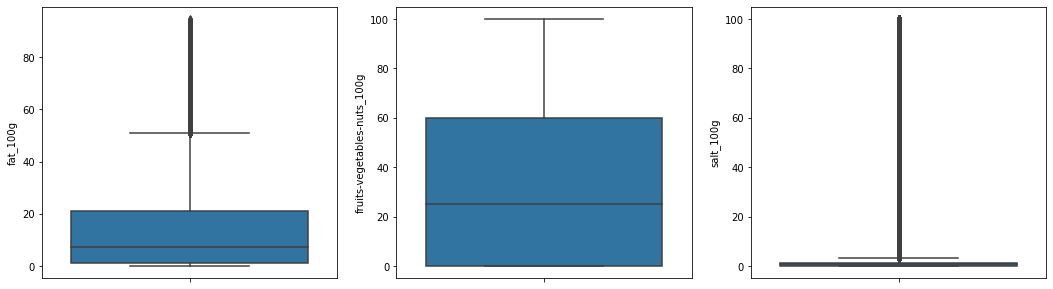

In [188]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(y=data["fat_100g"]);
plt.subplot(1,3,2)
sns.boxplot(y=data["fruits-vegetables-nuts_100g"]);
plt.subplot(1,3,3)
sns.boxplot(y=data["salt_100g"]);

In [ ]:
# les valeurs aberrantes ne se situent que dans l’extrémité supérieure 

In [189]:
def remove_outlier(data, energy_100g):
    q1 = data["energy_100g"].quantile(0.25)
    q3 = data["energy_100g"].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_high = q3+1.5*iqr
    data_out = data.loc[(data["energy_100g"] < fence_high)]
    return data_out

In [190]:
data=remove_outlier(data, 'energy_100g')

In [191]:
data=remove_outlier(data, 'sugars_100g')

In [192]:
data=remove_outlier(data, 'fat_100g')

In [193]:
data=remove_outlier(data, 'fiber_100g')

In [194]:
data=remove_outlier(data, 'proteins_100g')

In [195]:
data=remove_outlier(data, 'salt_100g')

In [196]:
data=remove_outlier(data, 'saturated-fat_100g')

In [197]:
data.shape

(995953, 14)

In [198]:
data.describe()

,energy_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,salt_100g,nutriscore_score,energy_cal,nutri_sum
count,995953.000000,995953.000000,995953.000000,995953.000000,978402.000000,346922.000000,995953.000000,7419.000000,952087.000000,484527.000000,995953.000000,995953.000000
mean,1133.919190,13.769628,29.541829,12.961980,4.885748,3.073734,8.442193,35.705980,1.279690,9.332999,1151.245609,50.946002
std,742.768818,19.008086,27.129755,15.157617,7.096895,4.885805,9.513054,36.136368,3.901947,8.833825,752.842406,31.184036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000
25%,460.000000,1.000000,5.000000,1.000000,0.200000,0.000000,1.900000,0.000000,0.100000,2.000000,470.700000,22.400000
50%,1090.000000,4.300000,19.000000,7.300000,1.900000,1.700000,6.000000,25.000000,0.600000,10.000000,1106.500000,47.500000
75%,1674.000000,20.000000,53.800000,21.000000,6.900000,3.700000,11.700000,60.000000,1.343660,16.000000,1695.000000,83.600000
max,3494.000000,100.000000,100.000000,94.100000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000,3699.900000,100.000000


In [199]:
# variable categoriques
data.describe(include='O')

,pnns_groups_1,nutriscore_grade
count,425567,484527
unique,9,5
top,Sugary snacks,d
freq,98905,148283


In [200]:
#les valeurs manquantes sur chaque colonne
data.isnull().sum()

energy_100g                         0
sugars_100g                         0
carbohydrates_100g                  0
fat_100g                            0
saturated-fat_100g              17551
fiber_100g                     649031
proteins_100g                       0
fruits-vegetables-nuts_100g    988534
salt_100g                       43866
pnns_groups_1                  570386
nutriscore_score               511426
nutriscore_grade               511426
energy_cal                          0
nutri_sum                           0
dtype: int64

Text(0.5, 1.0, 'Proportion de NaN sur chaque colonne')

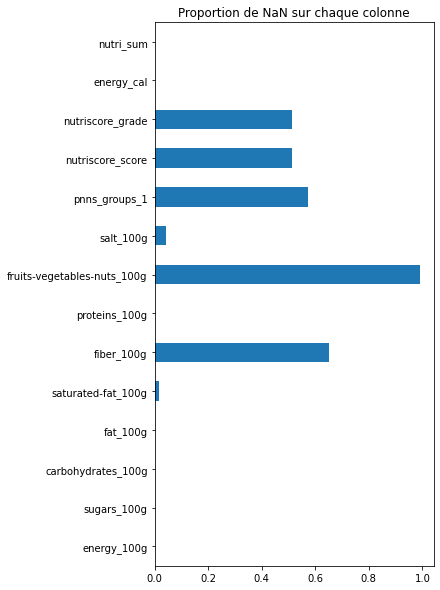

In [201]:
#representation des valeurs manquantes sur chaque colonne
plt.figure(figsize=(5, 10))
data.isnull().mean(axis=0).plot.barh()
plt.title("Proportion de NaN sur chaque colonne")

In [202]:
# un nombre important de valeurs manquantes, on peut pas tout supprimer

In [203]:
# renseigner les valeurs numériques et celles catégoriques
cat_data=[]
num_data=[]
for i,c in enumerate(data.dtypes):
    if c==object:
        cat_data.append(data.iloc[:,i])
    else:
        num_data.append(data.iloc[:,i])
        
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

# les variables numeriques

In [237]:
num_data

,energy_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,salt_100g,nutriscore_score,energy_cal,nutri_sum
0,1569.0,15.0,70.1,7.0,3.08,1.7,7.8,25.0,1.40,10.0,1597.3,84.9
3,936.0,22.0,29.0,8.2,2.20,0.0,5.1,25.0,4.60,18.0,899.5,42.3
5,88.0,0.4,4.8,0.0,0.00,1.7,0.2,25.0,2.04,10.0,85.0,5.0
6,251.0,3.0,10.0,3.0,1.00,1.7,2.0,25.0,1.15,10.0,321.0,15.0
12,264.0,15.5,15.5,0.0,0.00,1.7,0.2,25.0,0.00,10.0,266.9,15.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1708987,1393.0,10.4,30.9,20.2,6.00,1.7,7.4,25.0,1.10,15.0,1438.9,58.5
1708989,925.0,24.0,35.0,7.6,4.80,1.7,2.6,25.0,0.28,12.0,935.6,45.2
1708992,418.0,1.0,2.0,12.0,1.00,1.7,1.0,25.0,1.00,10.0,519.0,15.0
1708995,100.0,0.6,2.4,0.3,0.00,1.7,1.6,25.0,0.64,10.0,79.7,4.3


In [205]:
num_data.shape

(995953, 12)

In [206]:
num_data.describe()

,energy_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,salt_100g,nutriscore_score,energy_cal,nutri_sum
count,995953.000000,995953.000000,995953.000000,995953.000000,978402.000000,346922.000000,995953.000000,7419.000000,952087.000000,484527.000000,995953.000000,995953.000000
mean,1133.919190,13.769628,29.541829,12.961980,4.885748,3.073734,8.442193,35.705980,1.279690,9.332999,1151.245609,50.946002
std,742.768818,19.008086,27.129755,15.157617,7.096895,4.885805,9.513054,36.136368,3.901947,8.833825,752.842406,31.184036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000
25%,460.000000,1.000000,5.000000,1.000000,0.200000,0.000000,1.900000,0.000000,0.100000,2.000000,470.700000,22.400000
50%,1090.000000,4.300000,19.000000,7.300000,1.900000,1.700000,6.000000,25.000000,0.600000,10.000000,1106.500000,47.500000
75%,1674.000000,20.000000,53.800000,21.000000,6.900000,3.700000,11.700000,60.000000,1.343660,16.000000,1695.000000,83.600000
max,3494.000000,100.000000,100.000000,94.100000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000,3699.900000,100.000000


# Imputation des valeurs numerique par la mediane

In [207]:
#pour les variables numeriques, je vais remplacer les valeurs manquantes par la mediane
num_data=num_data.fillna(num_data.median())

In [208]:
num_data.isnull().sum().any()

False

In [211]:
num_data.shape

(995953, 12)

In [212]:
num_data

,energy_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,salt_100g,nutriscore_score,energy_cal,nutri_sum
0,1569.0,15.0,70.1,7.0,3.08,1.7,7.8,25.0,1.40,10.0,1597.3,84.9
3,936.0,22.0,29.0,8.2,2.20,0.0,5.1,25.0,4.60,18.0,899.5,42.3
5,88.0,0.4,4.8,0.0,0.00,1.7,0.2,25.0,2.04,10.0,85.0,5.0
6,251.0,3.0,10.0,3.0,1.00,1.7,2.0,25.0,1.15,10.0,321.0,15.0
12,264.0,15.5,15.5,0.0,0.00,1.7,0.2,25.0,0.00,10.0,266.9,15.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1708987,1393.0,10.4,30.9,20.2,6.00,1.7,7.4,25.0,1.10,15.0,1438.9,58.5
1708989,925.0,24.0,35.0,7.6,4.80,1.7,2.6,25.0,0.28,12.0,935.6,45.2
1708992,418.0,1.0,2.0,12.0,1.00,1.7,1.0,25.0,1.00,10.0,519.0,15.0
1708995,100.0,0.6,2.4,0.3,0.00,1.7,1.6,25.0,0.64,10.0,79.7,4.3


In [213]:
num_data.describe()

,energy_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,salt_100g,nutriscore_score,energy_cal,nutri_sum
count,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000
mean,1133.919190,13.769628,29.541829,12.961980,4.833132,2.178515,8.442193,25.079750,1.249753,9.675507,1151.245609,50.946002
std,742.768818,19.008086,27.129755,15.157617,7.045046,2.956927,9.513054,3.251695,3.817599,6.170536,752.842406,31.184036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000
25%,460.000000,1.000000,5.000000,1.000000,0.200000,1.700000,1.900000,25.000000,0.100000,10.000000,470.700000,22.400000
50%,1090.000000,4.300000,19.000000,7.300000,1.900000,1.700000,6.000000,25.000000,0.600000,10.000000,1106.500000,47.500000
75%,1674.000000,20.000000,53.800000,21.000000,6.700000,1.700000,11.700000,25.000000,1.300000,10.000000,1695.000000,83.600000
max,3494.000000,100.000000,100.000000,94.100000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000,3699.900000,100.000000


In [214]:
num_data.isnull().sum().any()

False

# les variables catégoriques

In [215]:
cat_data

,pnns_groups_1,nutriscore_grade
0,NaN,NaN
3,Fat and sauces,d
5,NaN,NaN
6,NaN,NaN
12,NaN,NaN
...,...,...
1708987,NaN,d
1708989,Sugary snacks,d
1708992,NaN,NaN
1708995,NaN,NaN


In [216]:
cat_data.isnull().sum().any()

True

In [217]:
cat_data.isnull().sum().sum()

1081812

In [218]:
cat_data.describe()

,pnns_groups_1,nutriscore_grade
count,425567,484527
unique,9,5
top,Sugary snacks,d
freq,98905,148283


In [219]:
cat_data["nutriscore_grade"].unique()

array([nan, 'd', 'b', 'a', 'c', 'e'], dtype=object)

In [220]:
cat_data["pnns_groups_1"].unique()

array([nan, 'Fat and sauces', 'Composite foods', 'Sugary snacks',
       'Fruits and vegetables', 'Milk and dairy products',
       'Fish Meat Eggs', 'Cereals and potatoes', 'Salty snacks',
       'Beverages'], dtype=object)

In [221]:
cat_data["pnns_groups_1"].value_counts()

Sugary snacks              98905
Cereals and potatoes       53948
Fish Meat Eggs             51308
Milk and dairy products    50780
Composite foods            42789
Beverages                  37640
Fat and sauces             36914
Fruits and vegetables      30466
Salty snacks               22817
Name: pnns_groups_1, dtype: int64

<AxesSubplot:>

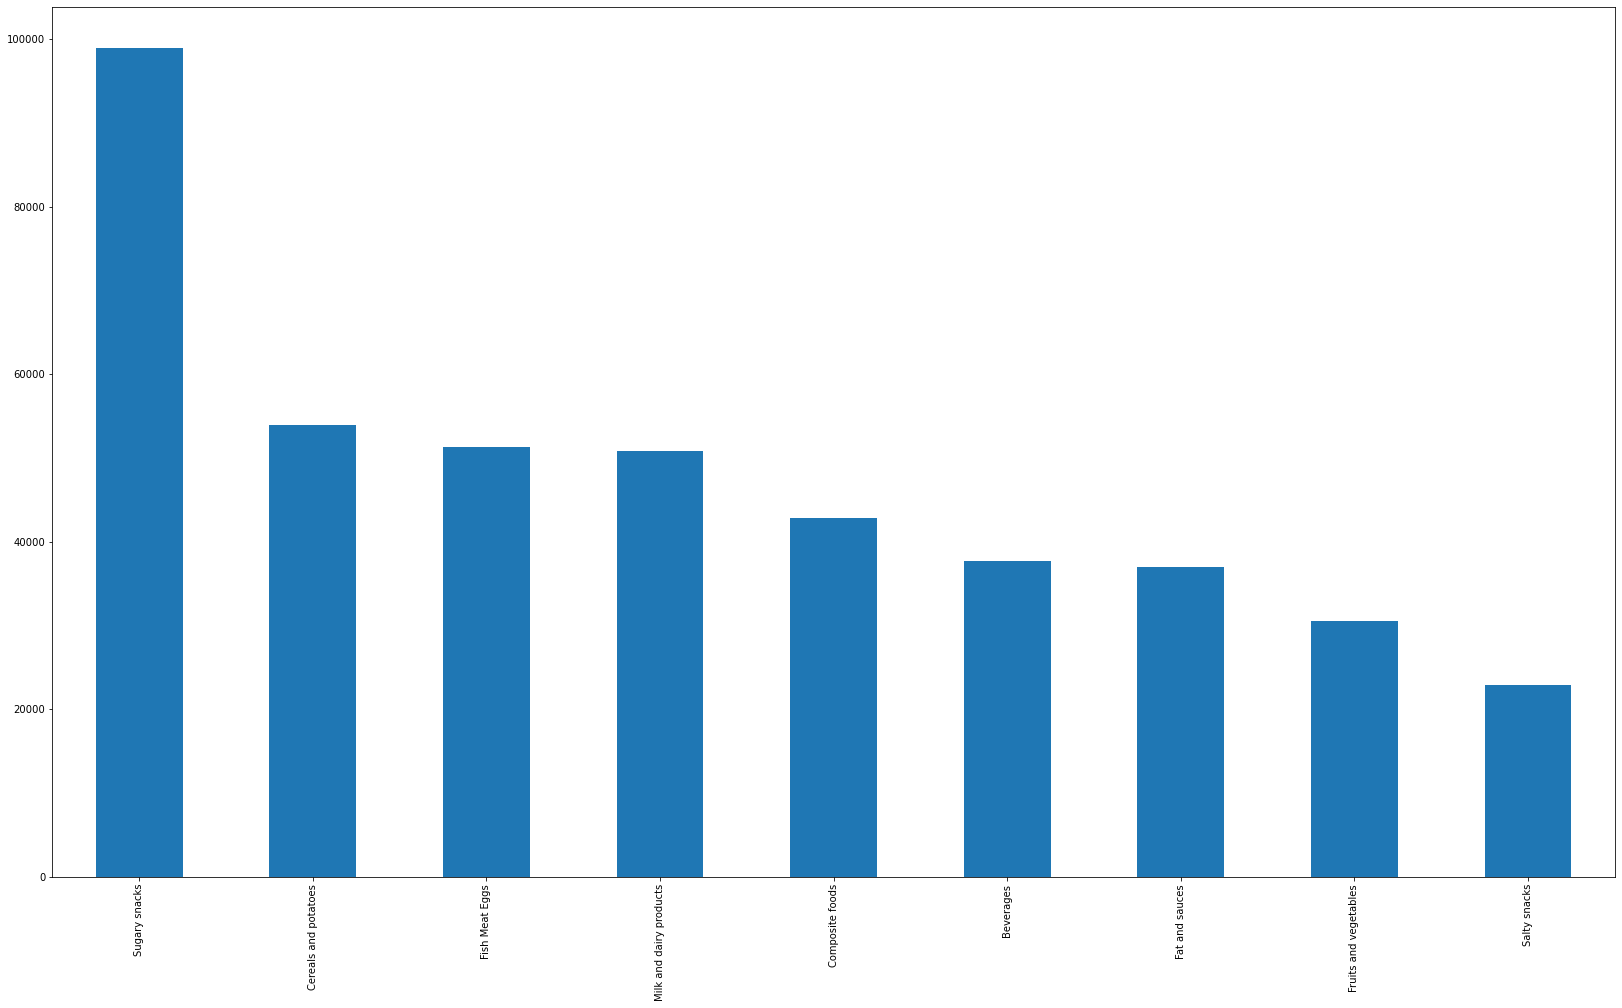

In [222]:
cat_data["pnns_groups_1"].value_counts().plot(kind='bar')

# Imputation des valeurs categoriques par les valeurs dominantes

In [223]:
#pour les variables categoriques, je vais remplacer les valeurs manquantes par les valeurs qui se repetent le plus
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [224]:
cat_data

,pnns_groups_1,nutriscore_grade
0,Sugary snacks,d
3,Fat and sauces,d
5,Sugary snacks,d
6,Sugary snacks,d
12,Sugary snacks,d
...,...,...
1708987,Sugary snacks,d
1708989,Sugary snacks,d
1708992,Sugary snacks,d
1708995,Sugary snacks,d


In [225]:
cat_data.isnull().sum().any()

False

In [226]:
cat_data["nutriscore_grade"].unique()

array(['d', 'b', 'a', 'c', 'e'], dtype=object)

In [227]:
cat_data["pnns_groups_1"].unique()

array(['Sugary snacks', 'Fat and sauces', 'Composite foods',
       'Fruits and vegetables', 'Milk and dairy products',
       'Fish Meat Eggs', 'Cereals and potatoes', 'Salty snacks',
       'Beverages'], dtype=object)

In [228]:
cat_data.isnull().sum().any()

False

In [229]:
cat_data.isnull().sum().sum()

0

In [230]:
cat_data.shape

(995953, 2)

In [231]:
num_data.shape

(995953, 12)

# Encodge des variables categoriques

# la variable target

#transformer la colonne nutriscore_grade
target_value={'a':1,'b':2,'c':3, 'd':4, 'e':5}
target=cat_data['nutriscore_grade']
cat_data.drop('nutriscore_grade', axis=1, inplace=True)
target=target.map(target_value)
target

# Encodage de la variable categoriquepar OrdinalEncoder: pnns_groups_1

cat_data

#convertir les variables categoriques en numeriques
from sklearn.preprocessing import OrdinalEncoder
cat_data['pnns_groups_1'].unique()
enc = OrdinalEncoder()
print(enc)
enc.fit_transform(cat_data[['pnns_groups_1']])
cat_data[['pnns_groups_1']] = enc.fit_transform(cat_data[['pnns_groups_1']])

cat_data

#concatener les variables numeriques et categoriques et specifier la variable target
X= pd.concat([num_data,cat_data],axis=1)
Y=target

In [232]:
df_new=pd.concat([num_data,cat_data],axis=1)

In [233]:
# on supprime les lignes avec des valeurs manquantes; difference entre dimension de cat_data et num_data nettoyé
df_new.dropna(axis = 0, how = "any", inplace=True)

In [234]:
df_new.shape

(995953, 14)

In [235]:
df_new.isnull().sum().any()

False

# Enregistrement du fichier Nettoyé

In [236]:
#enregistrer notre fichier de base données netoyé pour l'analyse exploratoire
df_new.to_csv("data_new_to_analyse_median.csv", header=True, index=False) 